In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score,recall_score,precision_score, mean_absolute_error,mean_squared_error
import tensorflow as tf
from xgboost import XGBClassifier

In [61]:
data_file = "data\\train.csv"
test_file = "data\\test.csv"
sub_file = "data\\sub.csv"
plt.rc('font',size=6)
SEED=1234

In [62]:
housing_data = pd.read_csv(data_file)
display(housing_data.head())
display(housing_data.describe())

y=housing_data["SalePrice"]
housing_data=housing_data.drop(["SalePrice","Id"],axis=1)
features = housing_data.columns
print(features)
num_features = len(features)-2

cats = ['MSZoning', 'Street','Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
       'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical',  'KitchenQual',
        'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive',  'PoolQC',
       'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition']

non_cats= [c for c in features if c not in cats]
onehot_data = pd.get_dummies(data = housing_data,
                        prefix = cats,
                        columns = cats)
#onehot_data = onehot_data.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('.'))

for f in non_cats:
    c = housing_data[f].corr(y)
    CORRPAR="~~WEAK~~"
    if abs(c) >0.5:
        CORRPAR = "++HIGH++"
    elif abs(c)<0.25:
        CORRPAR = "--LOW--"
        print (f"Dropping Feature {f}")
        
        onehot_data.drop(f,axis=1)
        
#pre_drop_f = ["2ndFlrSF","1stFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath"]    
X_train,X_cv,y_train,y_cv=train_test_split(onehot_data,y,train_size=0.70,random_state = SEED)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_cv_encoded=le.fit_transform(y_cv)
y_train=np.asarray(y_train)
X_train=np.asarray(X_train)
y_cv=np.asarray(y_cv)
X_cv=np.asarray(X_cv)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

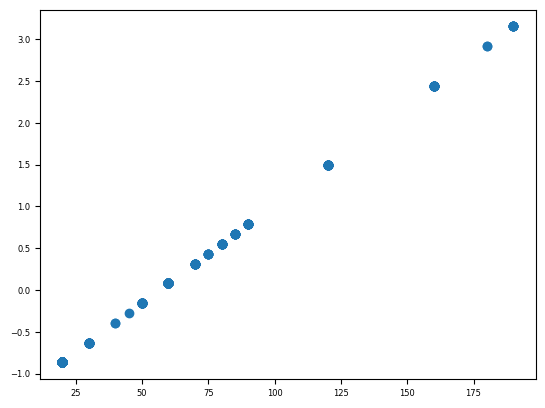

In [63]:
#Scaling
tf.random.set_seed(SEED)  # applied to achieve consistent results
scaler_linear = StandardScaler()
# Compute the mean and standard deviation of the training set then transform it
X_train_scaled=scaler_linear.fit_transform(X_train)
X_cv_scaled=scaler_linear.transform(X_cv)
plt.scatter(X_cv[:,0],X_cv_scaled[:,0])

[0]	validation_0-mlogloss:6.25774
[1]	validation_0-mlogloss:6.25597
[2]	validation_0-mlogloss:6.25541
[3]	validation_0-mlogloss:6.27401
[4]	validation_0-mlogloss:6.28547
[5]	validation_0-mlogloss:6.29643
[6]	validation_0-mlogloss:6.32149
[7]	validation_0-mlogloss:6.34951
[8]	validation_0-mlogloss:6.36810
[9]	validation_0-mlogloss:6.37784
Decision Tree with 10 estimators and LR 0.3
Metrics train: Accuracy score: 0.1117
Metrics Val: Accuracy score: 0.0046


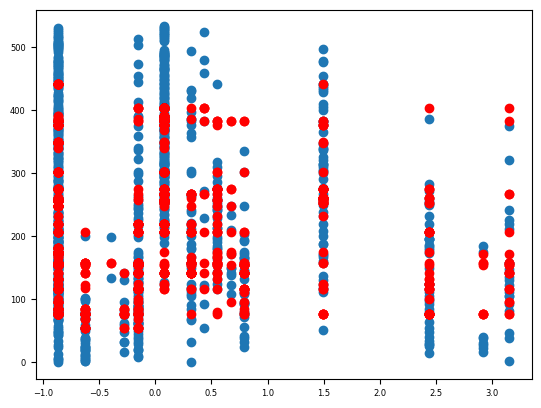

[0]	validation_0-mlogloss:6.26677
[1]	validation_0-mlogloss:6.26060
[2]	validation_0-mlogloss:6.25118
[3]	validation_0-mlogloss:6.24790
[4]	validation_0-mlogloss:6.24240
[5]	validation_0-mlogloss:6.24115
[6]	validation_0-mlogloss:6.24049
[7]	validation_0-mlogloss:6.24303
[8]	validation_0-mlogloss:6.24595
[9]	validation_0-mlogloss:6.25063
Decision Tree with 10 estimators and LR 0.1
Metrics train: Accuracy score: 0.1273
Metrics Val: Accuracy score: 0.0068


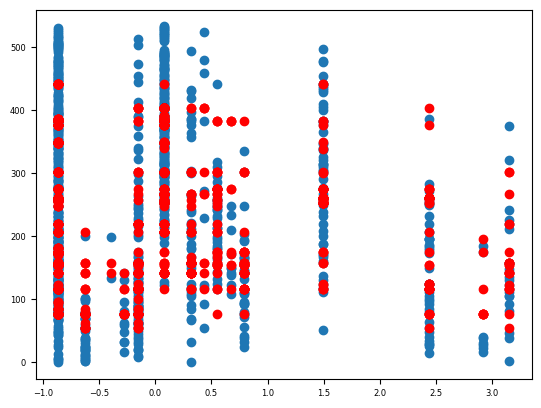

[(10, 0.3), (10, 0.1)]


In [68]:
learning_rates=[0.3,0.1]#,0.06,0.01,0.006,0.001]
accuracy_list_train=[]
accuracy_list_cv=[]
n_estimators_list = [10]#,50,100,500]
l_n_est_list=[]
for n_estimator in n_estimators_list:
    for l in learning_rates:

        xgb_model = XGBClassifier    (n_estimators=n_estimator, learning_rate = l,early_stopping_rounds = 10,random_state = SEED,verbosity=0)
        #xgb_model = XGBClassifier    (n_estimators = n_est_best, max_depth=best_index,learning_rate = best_learning_rate,early_stopping_rounds = 10,random_state = SEED,verbosity=0)
        xgb_model.fit(X_train_scaled,y_train_encoded, eval_set = [(X_cv_scaled,y_cv_encoded)])
        yhat_train = xgb_model.predict(X_train_scaled)
        yhat_cv = xgb_model.predict(X_cv_scaled)
        acc_train = accuracy_score(yhat_train,y_train_encoded)
        #prec_train = precision_score(yhat_train,y_train)
        #recall_train = recall_score(yhat_train,y_train)

        acc_cv=accuracy_score(yhat_cv,y_cv_encoded)
        #prec_cv=precision_score(yhat_cv,y_cv)
        #recall_cv=recall_score(yhat_cv,y_cv)
        print(f"Decision Tree with {n_estimator} estimators and LR {l}")

        print(f"Metrics train: Accuracy score: {acc_train:.4f}")
        print(f"Metrics Val: Accuracy score: {acc_cv:.4f}")
        plt.scatter(X_train_scaled[:,0],y_train_encoded)
        l_n_est_list.append((n_estimator,l))
        accuracy_list_train.append(acc_train)
        accuracy_list_cv.append(acc_cv)
        #print(f"Metrics train: Accuracy score: {acc_train:.4f} Precision score: {prec_train:.4f} Recall score: {recall_train:.4f}")
        #print(f"Metrics Val: Accuracy score: {acc_cv:.4f} Precision score: {prec_cv:.4f} Recall score: {recall_cv:.4f}")

        plt.scatter(X_train_scaled[:,0],yhat_train,color="r")
        plt.show()
        #yhat_test = xgb_model.predict(X_test[features])
print (l_n_est_list)

Max Accuracy at n_est, LR: (10, 0.1), Val Accuracy: 0.00683371298405467, Train Accuracy: 0.12732615083251714


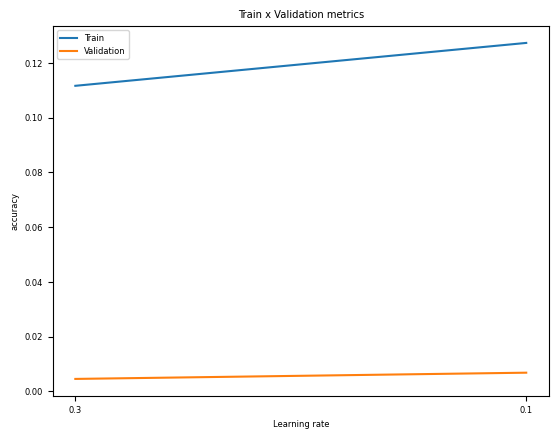

In [69]:
plt.title('Train x Validation metrics')
plt.xlabel('Learning rate')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(learning_rates )),labels=learning_rates)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_cv)
plt.legend(['Train','Validation'])
plt.show
best_index=np.argmax(accuracy_list_cv)
print(f"Max Accuracy at n_est, LR: {l_n_est_list[best_index]}, Val Accuracy: {accuracy_list_cv[best_index]}, Train Accuracy: {accuracy_list_train[best_index]}")
best_learning_rate = learning_rates[best_index]